# 8 Two-Point Boundary Value Problems

# 8.1 Introduction

# 8.2 Shooting Method

## Second-Order Differential Equation

### linInterp

In [ ]:
# %load code/linInterp.py
## module linInterp
''' root = linInterp(f,x1,x2).
    Finds the zero of the linear function f(x) by straight
    line interpolation based on x = x1 and x2.
'''
def linInterp(f,x1,x2):
    f1 = f(x1)
    f2 = f(x2)
    return x2 - f2*(x2 - x1)/(f2 - f1)
        


### EXAMPLE8.1

In [2]:
#!/usr/bin/python
## example8_1
import numpy as np
from run_kut4 import *
from ridder import *
from printSoln import *

def initCond(u): # Init. values of [y,y’]; use ’u’ if unknown
    return np.array([0.0, u])

def r(u): # Boundary condition residual--see Eq. (8.3)
    X,Y = integrate(F,xStart,initCond(u),xStop,h)
    y = Y[len(Y) - 1]
    r = y[0] - 1.0
    return r

def F(x,y): # First-order differential equations
    F = np.zeros(2)
    F[0] = y[1]
    F[1] = -3.0*y[0]*y[1]
    return F

xStart = 0.0 # Start of integration
xStop = 2.0 # End of integration
u1 = 1.0 # 1st trial value of unknown init. cond.
u2 = 2.0 # 2nd trial value of unknown init. cond.
h = 0.1 # Step size
freq = 2 # Printout frequency
u = ridder(r,u1,u2) # Compute the correct initial condition
X,Y = integrate(F,xStart,initCond(u),xStop,h)
printSoln(X,Y,freq)
input("\nPress return to exit")


        x         y[ 0 ]        y[ 1 ]  
   0.0000e+00    0.0000e+00    1.5145e+00 
   2.0000e-01    2.9404e-01    1.3848e+00 
   4.0000e-01    5.4170e-01    1.0743e+00 
   6.0000e-01    7.2187e-01    7.3287e-01 
   8.0000e-01    8.3944e-01    4.5752e-01 
   1.0000e+00    9.1082e-01    2.7013e-01 
   1.2000e+00    9.5227e-01    1.5429e-01 
   1.4000e+00    9.7572e-01    8.6471e-02 
   1.6000e+00    9.8880e-01    4.7948e-02 
   1.8000e+00    9.9602e-01    2.6430e-02 
   2.0000e+00    1.0000e+00    1.4522e-02 

Press return to exit


''

### EXAMPLE8.3

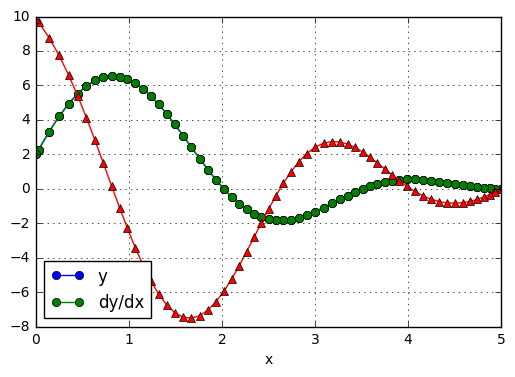


Press return to exit


''

In [5]:
#!/usr/bin/python
## example8_3
import matplotlib.pyplot as plt
import numpy as np
from run_kut5 import *
from linInterp import *

def initCond(u): # Initial values of [y,y',y"];
    # use 'u' if unknown
    return np.array([0.0, 0.0, u])

def r(u): # Boundary condition residual--see Eq. (8.3)
    X,Y = integrate(F,xStart,initCond(u),xStop,h)
    y = Y[len(Y) - 1]
    r = y[0] - 2.0
    return r

def F(x,y): # First-order differential equations
    F = np.zeros(3)
    F[0] = y[1]
    F[1] = y[2]
    F[2] = 2.0*y[2] + 6.0*x*y[0]
    return F

xStart = 5.0 # Start of integration
xStop = 0.0 # End of integration
u1 = 1.0 # 1st trial value of unknown init. cond.
u2 = 2.0 # 2nd trial value of unknown init. cond.
h = -0.1 # initial step size
freq = 2 # printout frequency
u = linInterp(r,u1,u2)
X,Y = integrate(F,xStart,initCond(u),xStop,h)
plt.plot(X,Y[:,0],'o-',X,Y[:,1],'^-')
plt.xlabel('x')
plt.legend(('y','dy/dx'),loc = 3)
plt.grid(True)
plt.show()
input("\nPress return to exit")

## Higher Order Equations

### EXAMPLE8.4

In [6]:
#!/usr/bin/python
## example8_4
import numpy as np
from bulStoer import *
from newtonRaphson2 import *
from printSoln import *

def initCond(u): # Initial values of [y,y',y",y"'];
    # use 'u' if unknown
    return np.array([0.0, u[0], 0.0, u[1]])

def r(u): # Boundary condition residuals--see Eq. (8.7)
    r = np.zeros(len(u))
    X,Y = bulStoer(F,xStart,initCond(u),xStop,H)
    y = Y[len(Y) - 1]
    r[0] = y[0]
    r[1] = y[2]
    return r

def F(x,y): # First-order differential equations
    F = np.zeros(4)
    F[0] = y[1]
    F[1] = y[2]
    F[2] = y[3]
    F[3] = x
    return F

xStart = 0.0 # Start of integration
xStop = 1.0 # End of integration
u = np.array([0.0, 1.0]) # Initial guess for {u}
H = 0.5 # Printout increment
freq = 1 # Printout frequency
u = newtonRaphson2(r,u,1.0e-4)
X,Y = bulStoer(F,xStart,initCond(u),xStop,H)
printSoln(X,Y,freq)
input("\nPress return to exit")


        x         y[ 0 ]        y[ 1 ]        y[ 2 ]        y[ 3 ]  
   0.0000e+00    0.0000e+00    1.9444e-02    0.0000e+00   -1.6667e-01 
   5.0000e-01    6.5104e-03    1.2150e-03   -6.2500e-02   -4.1667e-02 
   1.0000e+00    7.6881e-12   -2.2222e-02    7.5002e-11    3.3333e-01 

Press return to exit


''

### EXAMPLE8.5

In [8]:
#!/usr/bin/python
## example8_5
import numpy as np
from run_kut5 import *
from newtonRaphson2 import *
from printSoln import *

def initCond(u): # Initial values of [y,y',y",y"'];
    # use 'u' if unknown
    return np.array([0.0, 0.0, u[0], u[1]])

def r(u): # Boundary condition residuals--see Eq. (8.7)
    r = np.zeros(len(u))
    X,Y = integrate(F,x,initCond(u),xStop,h)
    y = Y[len(Y) - 1]
    r[0] = y[2]
    r[1] = y[3] - 1.0
    return r

def F(x,y): # First-order differential equations
    F = np.zeros(4)
    F[0] = y[1]
    F[1] = y[2]
    F[2] = y[3]

    if x == 0.0: F[3] = -12.0*y[1]*y[0]**2
    else: F[3] = -4.0*(y[0]**3)/x
    return F

x = 0.0 # Start of integration
xStop = 1.0 # End of integration
u = np.array([-1.0, 1.0]) # Initial guess for u
h = 0.1 # Initial step size
freq = 0 # Printout frequency
u = newtonRaphson2(r,u,1.0e-5)
X,Y = integrate(F,x,initCond(u),xStop,h)
printSoln(X,Y,freq)
input("\nPress return to exit")


        x         y[ 0 ]        y[ 1 ]        y[ 2 ]        y[ 3 ]  
   0.0000e+00    0.0000e+00    0.0000e+00   -9.7607e-01    9.7132e-01 
   1.0000e+00   -3.2607e-01   -4.8975e-01   -6.7408e-11    1.0000e+00 

Press return to exit


''

# 8.3 Finite Difference Method

## Second-Order Differential Equation

### EXAMPLE8.6

In [ ]:
#!/usr/bin/python
## example8_6
import numpy as np
from LUdecomp3 import *
import math

def equations(x,h,m): # Set up finite difference eqs.
    h2 = h*h
    d = np.ones(m + 1)*(-2.0 + 4.0*h2)
    c = np.ones(m)
    e = np.ones(m)
    b = np.ones(m+1)*4.0*h2*x
    d[0] = 1.0
    e[0] = 0.0
    b[0] = 0.0
    c[m-1] = 2.0
    return c,d,e,b

xStart = 0.0 # x at left end
xStop = math.pi/2.0 # x at right end
m = 10 # Number of mesh spaces
h = (xStop - xStart)/m
x = np.arange(xStart,xStop + h,h)
c,d,e,b = equations(x,h,m)
c,d,e = LUdecomp3(c,d,e)
y = LUsolve3(c,d,e,b)
print("\n x y")

for i in range(m + 1):
    print('{:14.5e} {:14.5e}'.format(x[i],y[i]))
input("\nPress return to exit")

### EXAMPLE8.7

In [13]:
#!/usr/bin/python
## example8_7
import numpy as np
from newtonRaphson2 import *

def residual(y): # Residuals of finite diff. Eqs. (8.11)
    r = np.zeros(m + 1)
    r[0] = y[0]
    r[m] = y[m] - 1.0
    for i in range(1,m):
        r[i] = y[i-1] - 2.0*y[i] + y[i+1] - h*h*F(x[i],y[i],(y[i+1] - y[i-1])/(2.0*h))
    return r

def F(x,y,yPrime): # Differential eqn. y" = F(x,y,y’)
    F = -3.0*y*yPrime
    return F

def startSoln(x): # Starting solution y(x)
    y = np.zeros(m + 1)
    for i in range(m + 1): y[i] = 0.5*x[i]
    return y

xStart = 0.0 # x at left end
xStop = 2.0 # x at right end
m = 10 # Number of mesh intervals
h = (xStop - xStart)/m
x = np.arange(xStart,xStop + h,h)
y = newtonRaphson2(residual,startSoln(x),1.0e-5)
print("\n x y")

for i in range(m + 1):
    print("%14.5e %14.5e" %(x[i],y[i]))
input("\nPress return to exit")


 x y
   0.00000e+00    0.00000e+00
   2.00000e-01    3.02404e-01
   4.00000e-01    5.54503e-01
   6.00000e-01    7.34691e-01
   8.00000e-01    8.49794e-01
   1.00000e+00    9.18132e-01
   1.20000e+00    9.56953e-01
   1.40000e+00    9.78457e-01
   1.60000e+00    9.90201e-01
   1.80000e+00    9.96566e-01
   2.00000e+00    1.00000e+00

Press return to exit


''

## Fourth-Order Differential Equation

### EXAMPLE8.8

In [15]:
#!/usr/bin/python
## example8_8
import numpy as np
from LUdecomp5 import *

def equations(x,h,m): # Set up finite difference eqs.
    h4 = h**4
    d = np.ones(m + 1)*6.0
    e = np.ones(m)*(-4.0)
    f = np.ones(m-1)
    b = np.zeros(m+1)
    d[0] = 1.0
    d[1] = 7.0
    e[0] = 0.0
    f[0] = 0.0
    d[m-1] = 7.0
    d[m] = 3.0
    b[m] = 0.5*h**3
    return d,e,f,b

xStart = 0.0 # x at left end
xStop = 0.5 # x at right end
m = 20 # Number of mesh spaces
h = (xStop - xStart)/m
x = np.arange(xStart,xStop + h,h)
d,e,f,b = equations(x,h,m)
d,e,f = LUdecomp5(d,e,f)
y = LUsolve5(d,e,f,b)
print('\n x y')
print('{:14.5e} {:14.5e}'.format(x[m-1],y[m-1]))
print('{:14.5e} {:14.5e}'.format(x[m],y[m]))
input("\nPress return to exit")


 x y
   4.75000e-01    5.19531e-03
   5.00000e-01    5.23438e-03

Press return to exit


''